# Overview

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
cols = np.load('../Data/Final/ClashOfClans_cols.npy', allow_pickle=True)
arr = np.load('../Data/Final/ClashOfClans.npy', allow_pickle=True)
df = pd.DataFrame(arr, columns=cols)
df = df[['post_id', 'time', 'post_text', 
            'images_description', 'shares', 'comments',
                'comments_full', 'reaction_count',
                'reactions', 'reactors']]
df[['shares', 'comments', 'reaction_count']] = df[['shares', 'comments', 'reaction_count']].astype(int)

In [ ]:
comments = pd.DataFrame(df[['post_id', 'time', 'comments', 'comments_full', 'shares']])

In [ ]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   post_id        167 non-null    object        
 1   time           167 non-null    datetime64[ns]
 2   comments       167 non-null    int32         
 3   comments_full  167 non-null    object        
 4   shares         167 non-null    int32         
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 5.3+ KB


In [ ]:
comments.describe()

,time,comments,shares
count,167,167.000000,167.000000
mean,2023-07-10 06:43:55.670658816,543.634731,187.215569
min,2022-12-12 17:57:11,31.000000,3.000000
25%,2023-04-24 05:01:35,299.000000,29.000000
50%,2023-08-15 15:00:49,429.000000,42.000000
75%,2023-09-30 09:07:58,672.000000,101.000000
max,2023-11-07 20:15:02,3700.000000,14000.000000
std,NaN,456.975789,1100.436557


In [ ]:
comments.head()

,post_id,time,comments,comments_full,shares
0,890116715803522,2023-11-07 20:15:02,267,"[{'comment_id': '1483156222461521', 'comment_u...",17
1,889593269189200,2023-11-06 19:15:55,764,"[{'comment_id': '358059689925658', 'comment_ur...",23
2,889556962526164,2023-11-06 17:36:19,395,"[{'comment_id': '1259825128044288', 'comment_u...",20
3,888646695950524,2023-11-04 19:54:48,475,"[{'comment_id': '285704867769829', 'comment_ur...",152
4,888172002664660,2023-11-03 20:35:02,294,"[{'comment_id': '592877136242752', 'comment_ur...",29


In [ ]:
comments['comments_full'].iloc[0]

[{'comment_id': '1483156222461521',
  'comment_url': 'https://facebook.com/1483156222461521',
  'commenter_id': '1547348997',
  'commenter_url': 'https://facebook.com/candi.warren?eav=AfbiNpmqys47oOcpozaaZ3-1fujQk0SS2bcFyRNYACc39Nx-5mGmYaUdXYJPithtcxw&fref=nf&rc=p&refid=52&__tn__=R&paipv=0',
  'commenter_name': 'Candi Warren',
  'commenter_meta': None,
  'comment_text': 'I’m maxed out on everything…. Can you make it so I can gift resources to my own clan. Otherwise, I’m a sitting duck for attacks… I still want to enjoy the game, some how',
  'comment_time': datetime.datetime(2023, 11, 8, 0, 0),
  'comment_image': None,
  'comment_reactors': [],
  'comment_reactions': None,
  'comment_reaction_count': None,
  'replies': [{'comment_id': '649800960690490',
    'comment_url': 'https://facebook.com/649800960690490',
    'commenter_id': '100004529382881',
    'commenter_url': 'https://facebook.com/adam.genez?eav=AfZCK-UleIF6a4cv3xxoeTM-QMa7sxHrV0MqIqNTvkhGl1tPKBfSBcfhKucQ5IYcP6I&fref=nf&rc=p

Text(0.5, 0.98, 'Biểu đồ thể hiện biến động số lượng bình luận và chia sẻ theo thời gian')

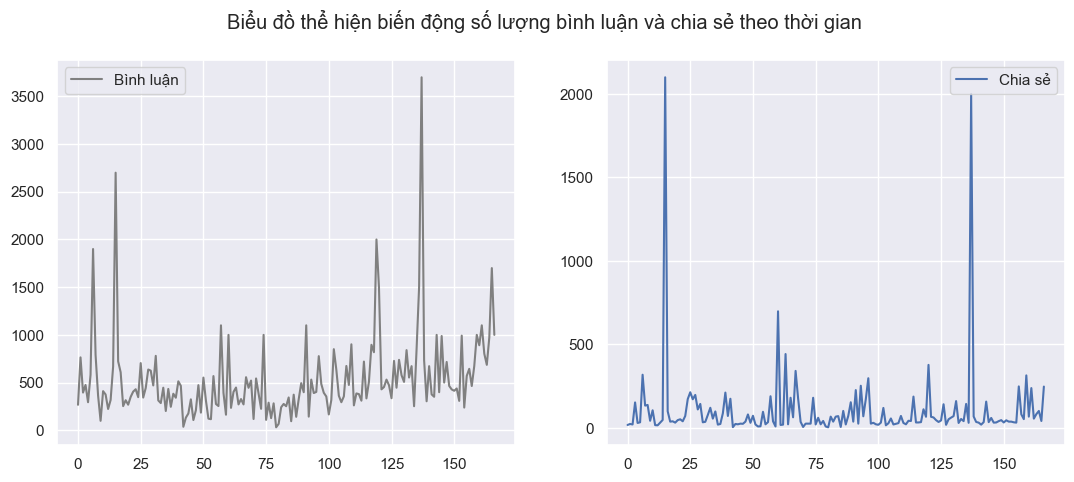

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
sns.lineplot(data=comments['comments'], ax=axs[0], label='Bình luận', color='grey')
axs[0].set_ylabel('')
sns.lineplot(data=comments['shares'], ax=axs[1], label='Chia sẻ')
axs[1].set_ylabel('')
plt.suptitle('Biểu đồ thể hiện biến động số lượng bình luận và chia sẻ theo thời gian')

In [ ]:
comments.loc[(comments['comments'] > 1500) | (comments['shares'] > 500)]

,post_id,time,comments,comments_full,shares
6,887129712768889,2023-11-01 22:32:35,1900,"[{'comment_id': '1746006649181843', 'comment_u...",318
15,882200249928502,2023-10-23 22:00:07,2700,"[{'comment_id': '1015783102805700', 'comment_u...",2100
60,859122382236289,2023-09-11 19:49:05,1000,"[{'comment_id': '793930129176016', 'comment_ur...",698
119,6804789822878616,2023-05-16 14:41:30,2000,"[{'comment_id': '958144218755939', 'comment_ur...",66
137,6586857294671871,2023-03-09 00:14:04,3700,"[{'comment_id': '895985071731568', 'comment_ur...",2000
165,6319757081381895,2022-12-14 19:40:13,1700,"[{'comment_id': '1345743539529532', 'comment_u...",41


In [ ]:
comments.drop(index=72, inplace=True)

<Axes: >

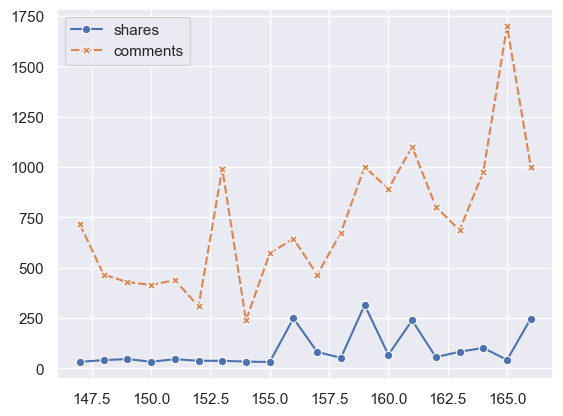

In [ ]:
sns.lineplot(comments[['shares', 'comments']].iloc[-20:], markers=True) 

In [ ]:
cmt_text = ""
id_cmters = []
cmts = np.array(comments['comments_full'])

def get(arr, cmt_txt=""):
    for cmt in arr:
        # print(cmt.keys())
        if cmt['commenter_id'] not in id_cmters:
            id_cmters.append(cmt['commenter_id'])
        cmt_txt += cmt['comment_text'] + " "
        if 'replies' in cmt.keys():
            cmt_txt += get(cmt['replies'])
    return cmt_txt

for cmt in cmts:
    cmt_text += get(cmt)
    # get(cmt)
    

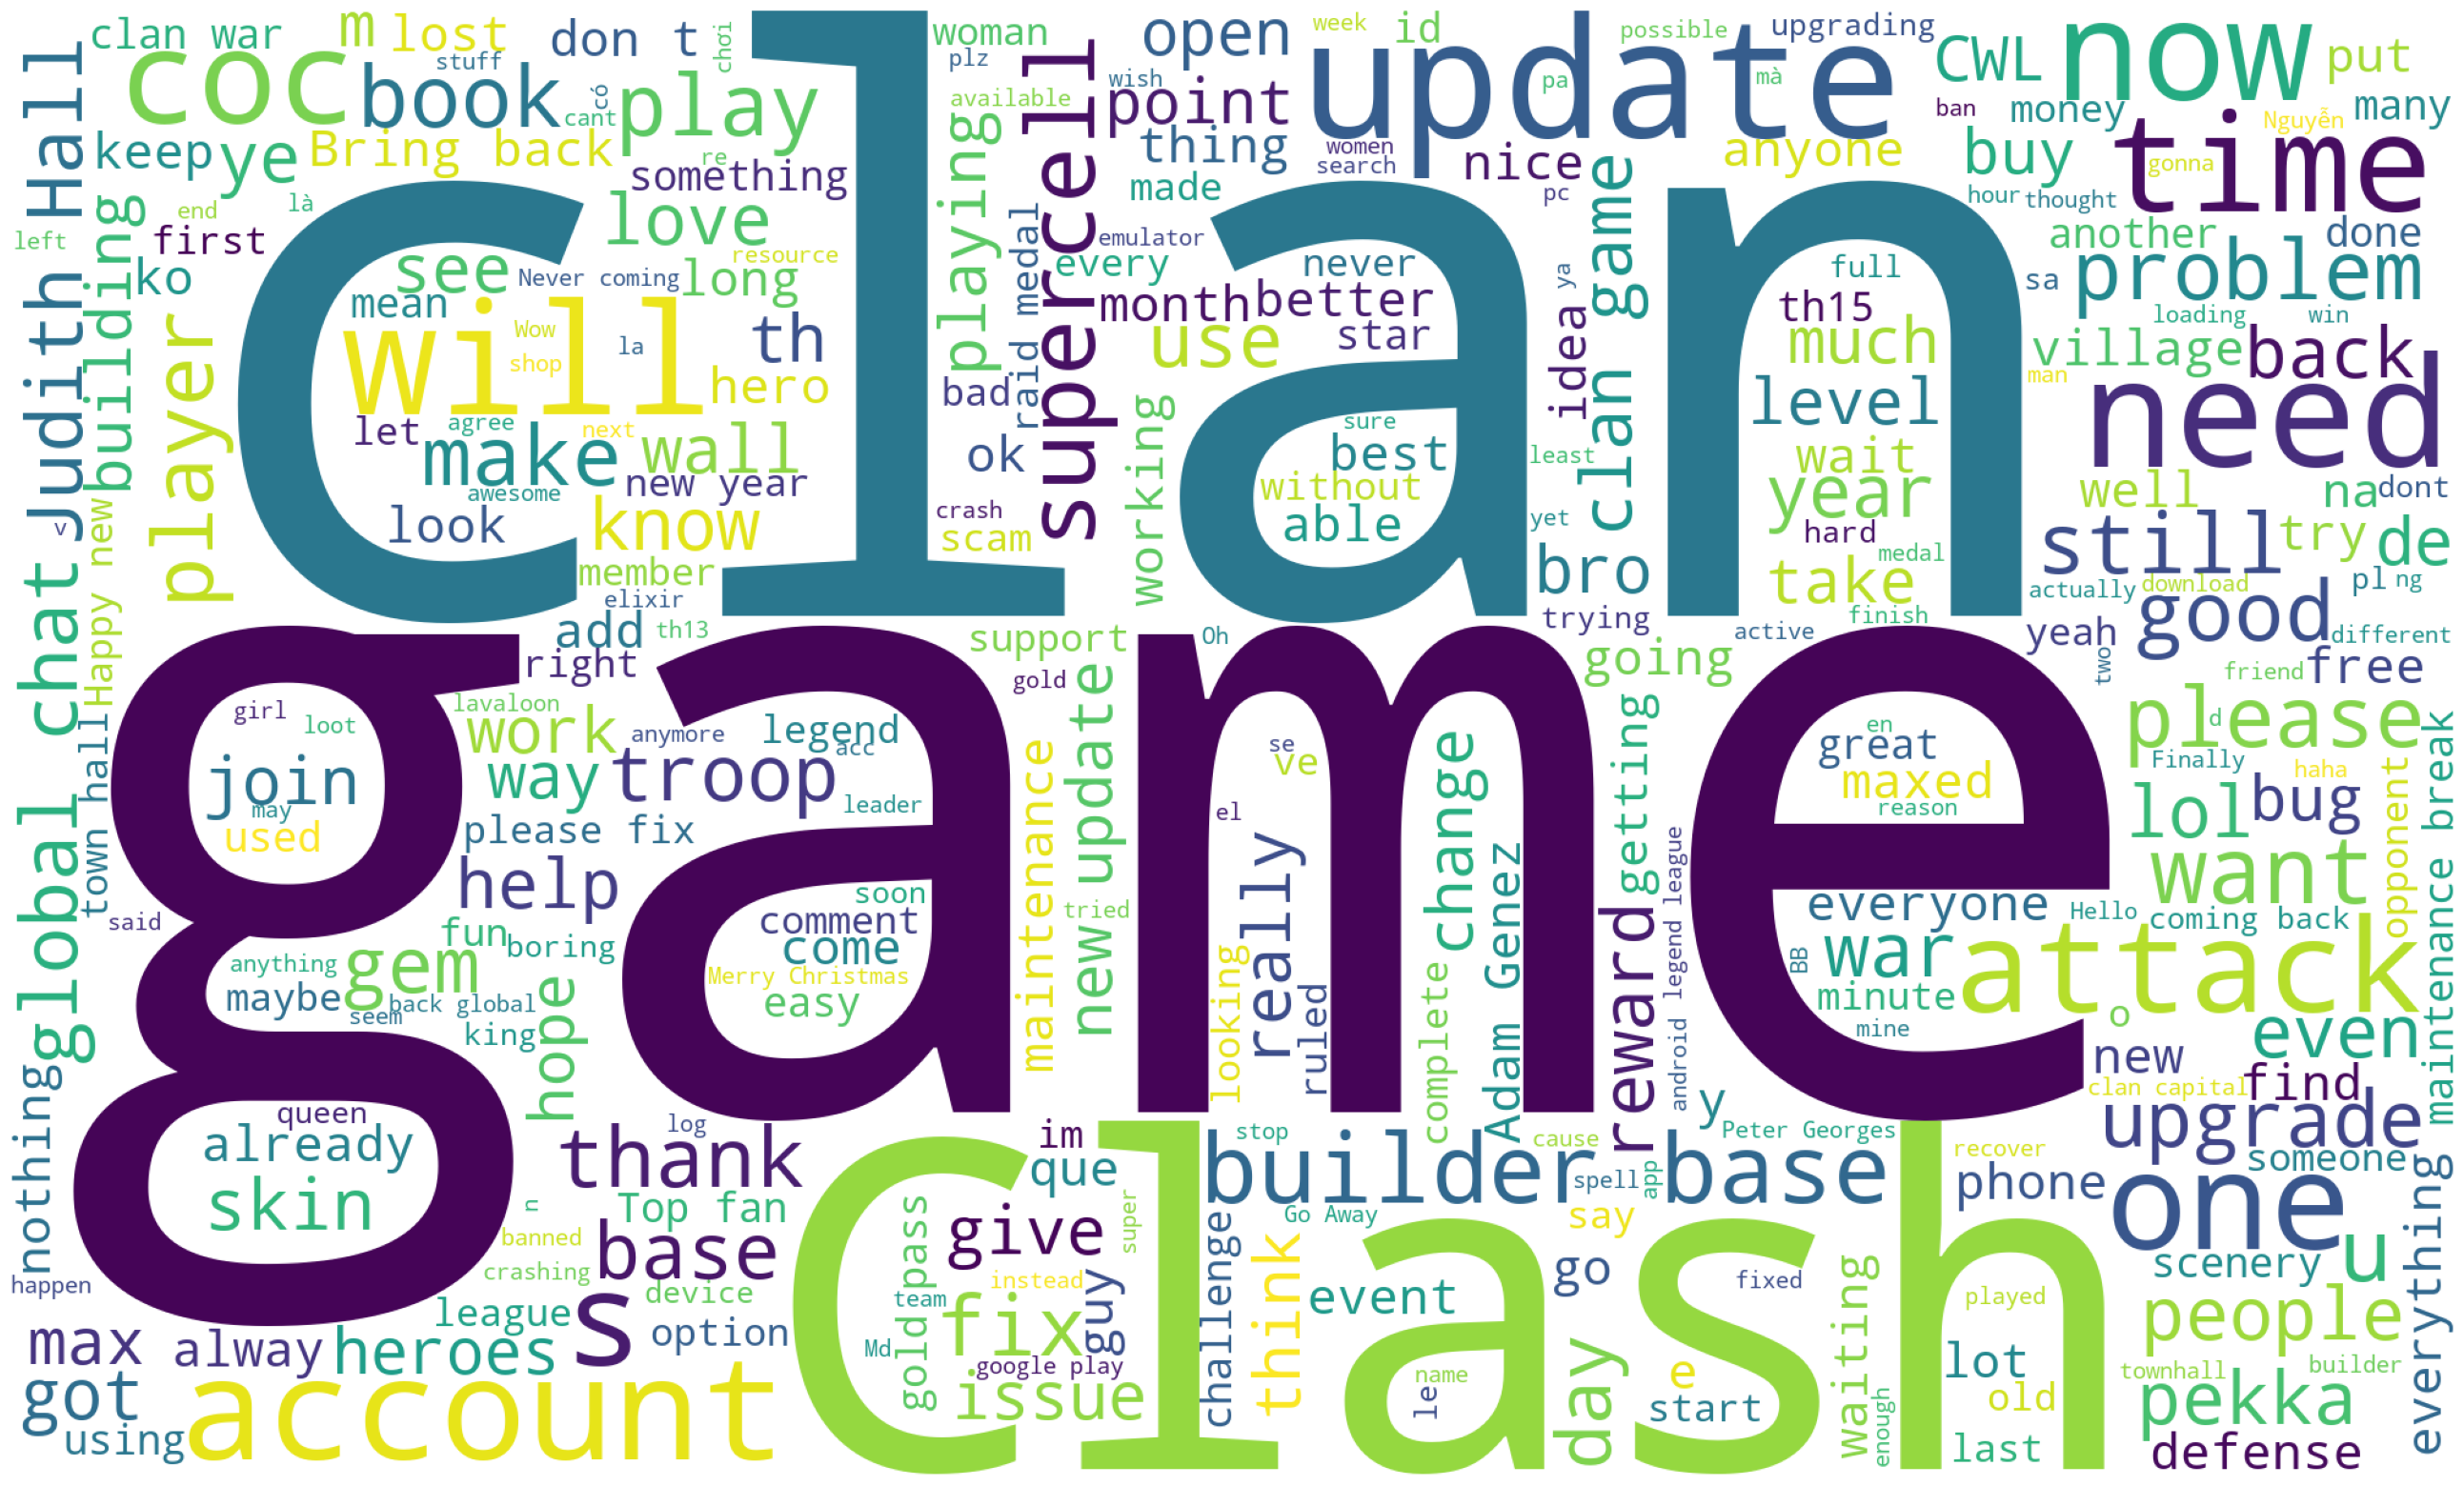

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(cmt_text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Commenters

## Get info

In [27]:
from facebook_scraper import get_profile

In [32]:
commenter = []

In [ ]:
max, index = 0, 0
cookie_path = '../config/cookies.txt'
for i in range(0, len(id_cmters)):
    try:
        profile = get_profile(id_cmters[i], cookies=cookie_path)
        if len(profile.keys()) > max:
            max = len(profile.keys())
            index = i
        commenter.append(profile)
        print(f"Added profile no.{len(commenter)}")
        if len(commenter) % 100 == 0:
            # To df
            post_df_full = pd.DataFrame(columns=commenter[7].keys(), index=range(len(commenter)), data=commenter)

            path='../Data/Cmters/Commenterss'
            # post_df_full.to_csv(path + '.csv')
    except Exception as e:
        # To df
        if len(commenter) > 0:
            post_df_full = pd.DataFrame(columns=commenter[7].keys(), index=range(len(commenter)), data=commenter)

            path='../Data/Cmters/Commenterss'
            # post_df_full.to_csv(path + '.csv')

In [34]:
len(commenter)

2032

In [52]:
print(f"Max: {max}, index: {index}")

Max: 21, index: 539


In [155]:
# To df
post_df_full = pd.DataFrame(columns=commenter[7].keys(), index=range(len(commenter)), data=commenter)

path='../Data/Cmters/Commenters'
# post_df_full.to_csv(path + '.csv')

## Preprocessing

In [160]:
post_df_full.drop_duplicates(subset=['id'], inplace=True)
post_df_full.dropna(subset=['Places lived', 'Relationship'], inplace=True)

In [164]:
from geopy.geocoders import Nominatim
from googletrans import Translator

In [180]:
geolocator = Nominatim(user_agent="crawl_page")

def country(place):
    place = place.split(',')[-1].strip()
    try:
        location = geolocator.geocode(place, language='en')
        return location.address.split(',')[-1].strip()
    except:
        try:
            translator = Translator()
            location = geolocator.geocode(translator.translate(place, dest='en').text, language='en')
            return country(place)
        except:
            print("Error at", place)
        return 1

print(country("Thanh hoa"))

def extract_location(place):
    if place is np.nan:
        return None
    if type(place) is not list:
        return None
    if 'text' not in place[0].keys():
        return None
    return place[0]['text']

post_df_full['location'] = post_df_full['Places lived'].apply(lambda x: extract_location(x))

# Get country of location
post_df_full['country'] = post_df_full['location'].apply(lambda x: country(x) if x else None)

Vietnam


In [186]:
import pycountry_convert as pc

In [188]:
def continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

post_df_full['continent'] = post_df_full['country'].apply(lambda x: continent(x) if x else None)

In [195]:
def rel(x):
    if type(x) is dict:
        return x['type']
    return x

In [196]:
post_df_full['rel'] = post_df_full['Relationship'].apply(lambda x: rel(x) if x else None)

In [232]:
def f(x):
    if 'since' in x and '\n' in x:
        return x[x.index('\n') + 1 : x.index('since')].strip()
    if 'since' in x:
        return x[: x.index('since')].strip()
    if '\n' in x:
        return x[x.index('\n') + 1 :].strip()
    return x
    

In [233]:
post_df_full['relationship'] = post_df_full['rel'].apply(lambda x: f(x) if x else None)

In [245]:
post_df_full = post_df_full[['id', 'Name', 'Friend_count', 'Follower_count', 'Following_count', 'location', 'country', 'continent', 'relationship']]

In [ ]:
post_df_full.to_csv(path + '.csv')

## Analyze commenters

In [30]:
commenters_df = pd.read_csv('../Data/Cmters/Commenters.csv')

In [31]:
commenters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               132 non-null    int64  
 1   Name             132 non-null    object 
 2   Friend_count     47 non-null     float64
 3   Follower_count   53 non-null     float64
 4   Following_count  11 non-null     float64
 5   location         132 non-null    object 
 6   country          132 non-null    object 
 7   continent        132 non-null    object 
 8   relationship     122 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 9.4+ KB


In [67]:
commenters_df.head()

,id,Name,Friend_count,Follower_count,Following_count,location,country,continent,relationship
0,100051419944069,Huy Anh,NaN,12838.0,178.0,Luc Ngan,Vietnam,Asia,Single
1,100004094897649,Trịnh Trung,NaN,2360.0,371.0,Thanh Hóa,Vietnam,Asia,Single
2,100090428256818,Minh Thiệnn,264.0,2.0,218.0,Can Tho,Vietnam,Asia,Single
3,100024020196271,Ťâ M Îm,NaN,NaN,NaN,Khulna,Bangladesh,Asia,Single
4,100002797914077,Muhamad Bukhari,NaN,NaN,NaN,"Penang, Malaysia",Malaysia,Asia,Single


(36,)


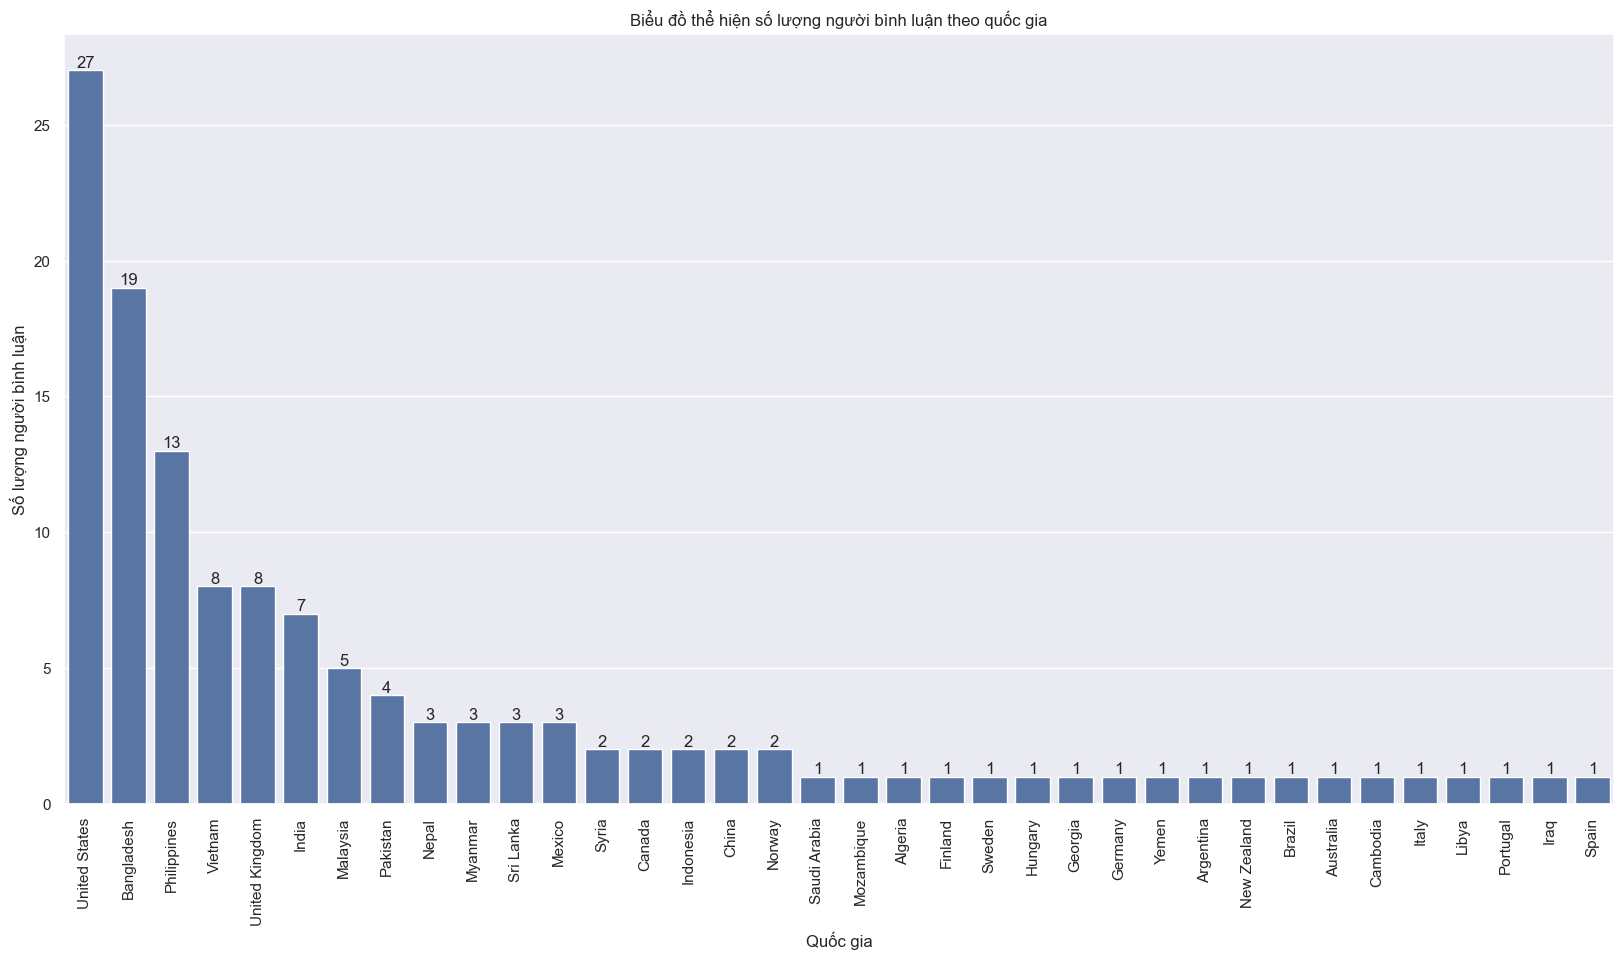

In [78]:
print(commenters_df['country'].value_counts().shape)
plt.figure(figsize=(20, 10))
ax = sns.barplot(commenters_df['country'].value_counts())
plt.xticks(rotation=90)
plt.title('Biểu đồ thể hiện số lượng người bình luận theo quốc gia')
plt.xlabel('Quốc gia')
plt.ylabel('Số lượng người bình luận')

for i in ax.containers:
    ax.bar_label(i,)

In [49]:
commenters_df['continent'].value_counts()

continent
Asia             76
North America    32
Europe           17
Africa            3
Oceania           2
South America     2
Name: count, dtype: int64

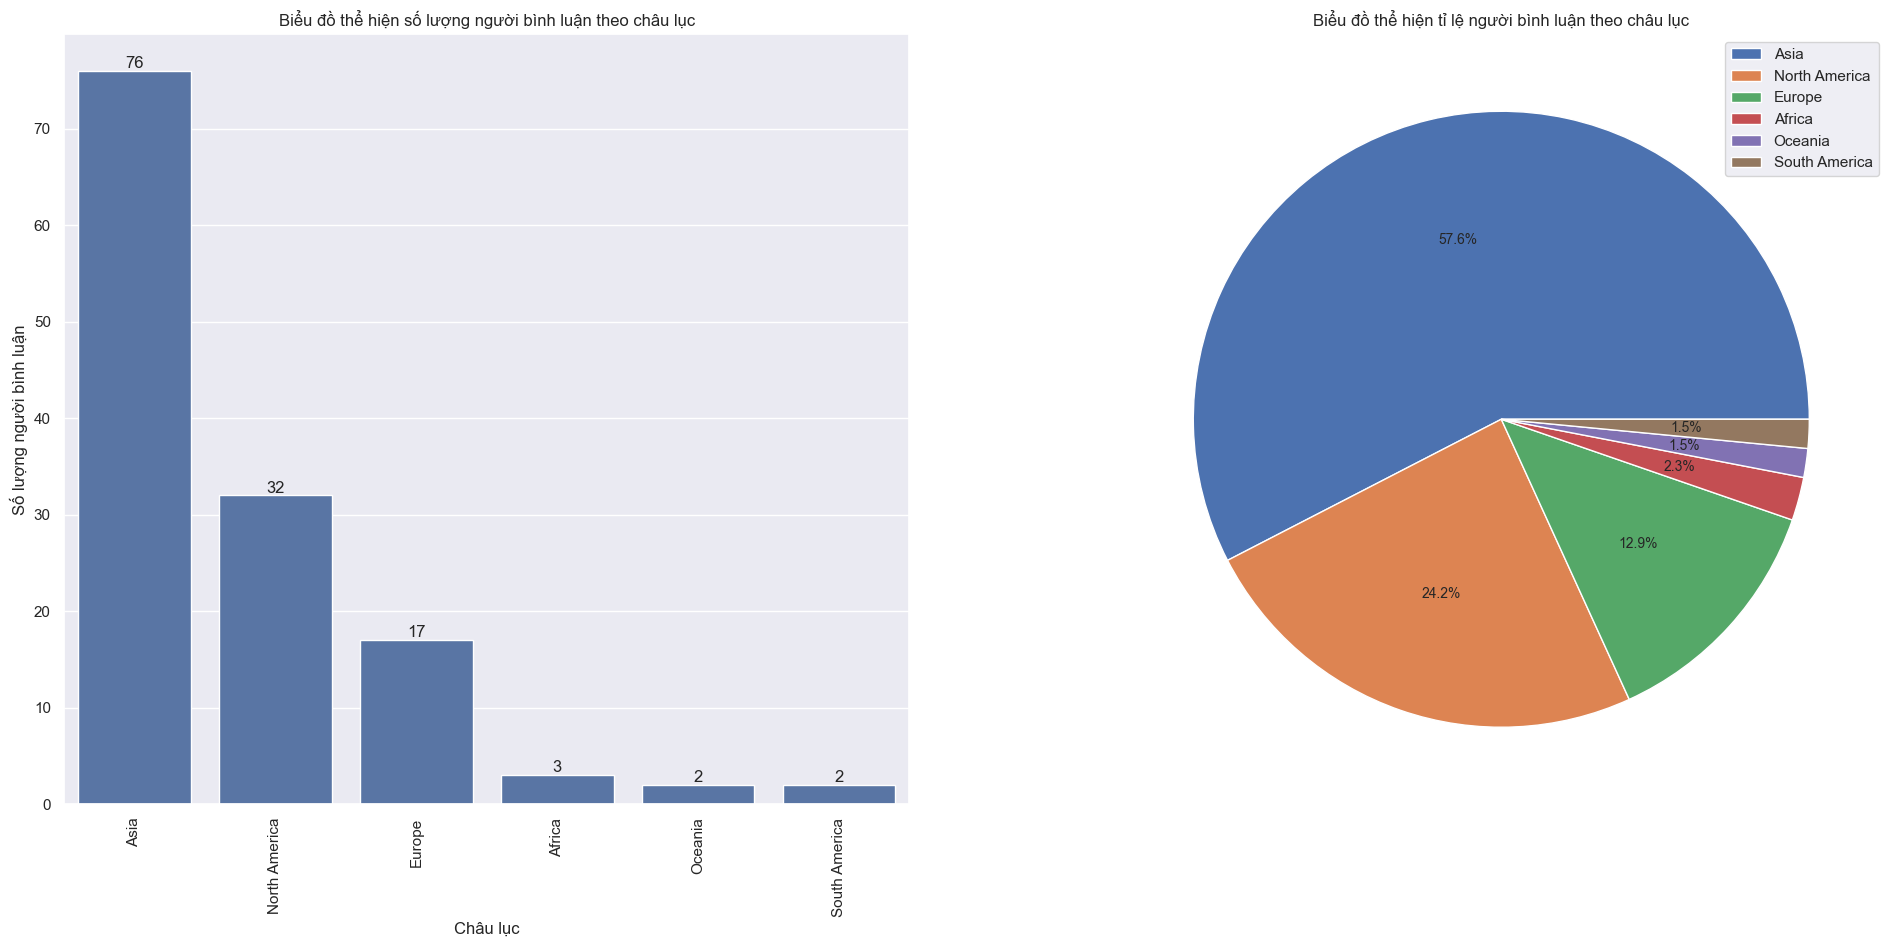

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(24, 10))
ax = sns.barplot(commenters_df['continent'].value_counts(), ax=axs[0])
plt.sca(ax)
plt.xticks(rotation=90)
plt.title('Biểu đồ thể hiện số lượng người bình luận theo châu lục')
plt.xlabel('Châu lục')
plt.ylabel('Số lượng người bình luận')

for i in ax.containers:
    ax.bar_label(i,)

plt.sca(axs[1])
ax1 = commenters_df['continent'].value_counts().plot(kind='pie', title='Biểu đồ thể hiện tỉ lệ người bình luận theo châu lục',  labels=['','','','','','',''], textprops={'fontsize': 10}, autopct='%1.1f%%', ax=axs[1])
plt.ylabel('')
plt.legend(loc='upper right', labels=['Asia', 'North America', 'Europe', 'Africa', 'Oceania', 'South America'])

In [58]:
commenters_df['relationship'].value_counts()

relationship
Single               71
Married              31
In a relationship    12
Engaged               5
It's complicated      2
Divorced              1
Name: count, dtype: int64

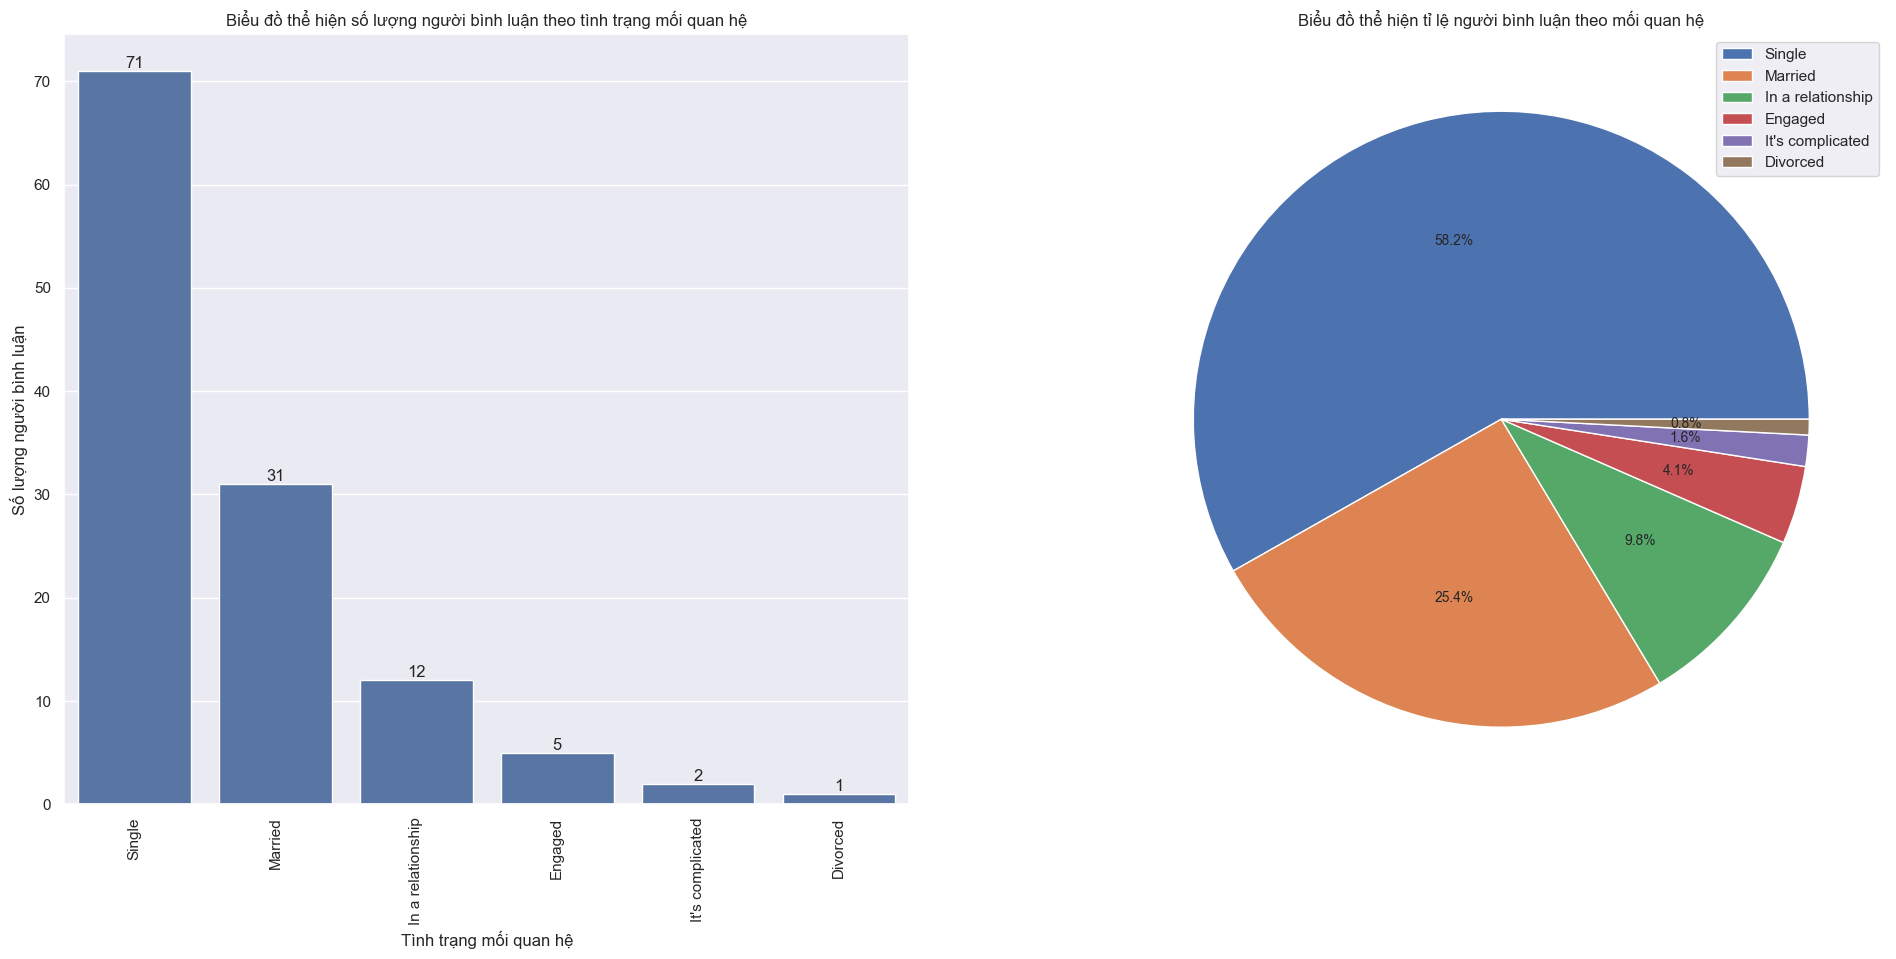

In [95]:
fig, axs = plt.subplots(1, 2, figsize=(24, 10))
ax = sns.barplot(commenters_df['relationship'].value_counts(), ax=axs[0])
plt.sca(ax)
plt.xticks(rotation=90)
plt.title('Biểu đồ thể hiện số lượng người bình luận theo tình trạng mối quan hệ')
plt.xlabel('Tình trạng mối quan hệ')
plt.ylabel('Số lượng người bình luận')

for i in ax.containers:
    ax.bar_label(i,)

plt.sca(axs[1])
ax1 = commenters_df['relationship'].value_counts().plot(kind='pie', title='Biểu đồ thể hiện tỉ lệ người bình luận theo mối quan hệ',  labels=['','','','','',''], textprops={'fontsize': 10}, autopct='%1.1f%%', ax=axs[1])
plt.ylabel('')
plt.legend(loc='upper right', labels=['Single', 'Married', 'In a relationship', 'Engaged', 'It\'s complicated', 'Divorced'])